In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import bambi as bmb
import arviz as az

In [2]:
success = np.array([33.48, 42.53, 48.53, 30.21, 38.76, 38.59, 52.93, 32.65, 52.42, 22.22, 41.40, 16.28, 40.83, 24.43, 56.38])
IQ = np.array([112, 94, 118, 87, 96, 106, 71, 91, 95, 94, 100, 98, 94, 113, 85])
years_in_school = np.array([12, 14, 18, 10, 13, 22, 17, 15, 16, 9, 19, 8, 20, 11, 21])
grit = np.array([2.2, 3.2, 3.4, 1.8, 2.8, 0.2, 4.4, 1.0, 4.6, 0.4, 1.6, 0.0, 1.2, 0.6, 4.2])
data = pd.DataFrame({
    'Success': success,
    'IQ': IQ,
    'Years_in_School': years_in_school,
    'Grit': grit
})

## Pymc

In [3]:
with pm.Model() as lr_model_1:
    b_0 = pm.Normal('intercept', mu=0, tau=0.0001)
    b_1 = pm.Normal('years_in_school', mu=0, tau=0.0001)
    tau = pm.Gamma('success_tau', alpha=0.01, beta=0.01)

    mu = b_0 + b_1 * years_in_school
    obs = pm.Normal('observation', mu=mu, tau=tau, observed=success)
    step = pm.NUTS()
    trace1 = pm.sample(25000, step=step, tune=5000, chains=1, nuts_sampler="nutpie")

Progress,Draws,Divergences,Step Size,Gradients/Draw
,30000,0,0.53,7


In [4]:
az.summary(trace1)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,7.597,7.862,-7.056,22.651,0.113,0.080,4969.0,5542.0,NaN
success_tau,0.016,0.006,0.006,0.028,0.000,0.000,10824.0,10731.0,NaN
success_tau_log__,-4.189,0.406,-4.973,-3.458,0.004,0.003,10824.0,10731.0,NaN
years_in_school,2.033,0.503,1.072,2.986,0.007,0.005,4994.0,5801.0,NaN


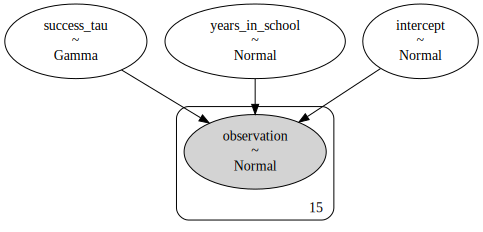

In [5]:
graphviz = pm.model_to_graphviz(lr_model_1)
graphviz

In [6]:
with lr_model_1:
    pm.compute_log_likelihood(trace1)

Output()

In [7]:
az.loo(trace1)

Computed from 25000 posterior samples and 15 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -54.34     2.31
p_loo        2.70        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)       15  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [8]:
az.waic(trace1)

/home/hwting/anaconda3/envs/rapids-24.12/lib/python3.11/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 25000 posterior samples and 15 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -54.15     2.19
p_waic        2.50        -

There has been a warning during the calculation. Please check the results.

In [9]:
with pm.Model() as lr_model_2:
    b_0 = pm.Normal('intercept', mu=0, tau=0.0001)
    b_1 = pm.Normal('grit', mu=0, tau=0.0001)
    tau = pm.Gamma('success_tau', alpha=0.01, beta=0.01)

    mu = b_0 + b_1 * grit
    obs = pm.Normal('observation', mu=mu, tau=tau, observed=success)
    step = pm.NUTS()
    trace2 = pm.sample(25000, step=step, tune=5000, chains=1, nuts_sampler="nutpie")

Progress,Draws,Divergences,Step Size,Gradients/Draw
,30000,0,0.64,3


In [10]:
az.summary(trace2)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
grit,6.403,1.142,4.256,8.581,0.012,0.008,9619.0,10579.0,NaN
intercept,24.613,2.955,18.939,30.178,0.031,0.022,9210.0,11450.0,NaN
success_tau,0.026,0.010,0.009,0.045,0.000,0.000,11364.0,10583.0,NaN
success_tau_log__,-3.731,0.405,-4.529,-3.024,0.004,0.003,11364.0,10583.0,NaN


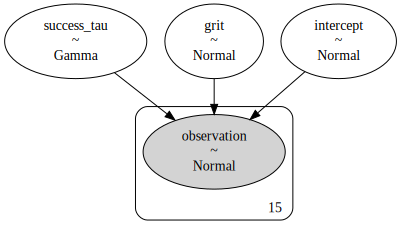

In [11]:
graphviz = pm.model_to_graphviz(lr_model_2)
graphviz

In [12]:
with lr_model_2:
    pm.compute_log_likelihood(trace2)

Output()

In [13]:
az.loo(trace2)

Computed from 25000 posterior samples and 15 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -51.04     2.81
p_loo        2.82        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)       15  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [14]:
az.waic(trace2)

/home/hwting/anaconda3/envs/rapids-24.12/lib/python3.11/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 25000 posterior samples and 15 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -50.82     2.66
p_waic        2.61        -

There has been a warning during the calculation. Please check the results.

In [15]:
df_compare_loo = az.compare({"model1": trace1, "model2": trace2}, ic="loo")
df_compare_loo

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model2,0,-51.037088,2.823351,0.000000,1.000000e+00,2.809182,0.000000,False,log
model1,1,-54.341423,2.696415,3.304336,3.552714e-15,2.308693,1.955136,False,log


In [16]:
df_compare_waic = az.compare({"model1": trace1, "model2": trace2}, ic="waic")
df_compare_waic

/home/hwting/anaconda3/envs/rapids-24.12/lib/python3.11/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/hwting/anaconda3/envs/rapids-24.12/lib/python3.11/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
model2,0,-50.821832,2.608095,0.000000,1.000000e+00,2.659684,0.000000,True,log
model1,1,-54.145169,2.500160,3.323336,4.440892e-16,2.189969,1.939824,True,log


## Bambi

In [17]:
model1 = bmb.Model('Success ~ Years_in_School', data=data)
results1 = model1.fit(draws=25000, tune=5000, chains=1)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, Intercept, Years_in_School]


Output()

Sampling 1 chain for 5_000 tune and 25_000 draw iterations (5_000 + 25_000 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


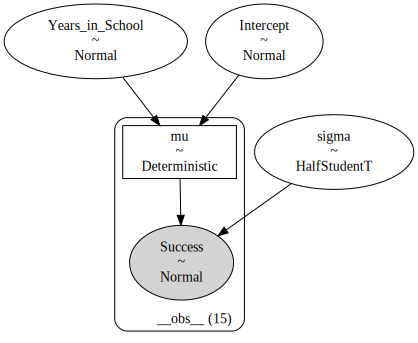

In [18]:
graphviz = pm.model_to_graphviz(model1.backend.model)
graphviz

In [19]:
az.summary(results1)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,7.910,8.000,-7.101,23.275,0.061,0.049,17522.0,13952.0,NaN
Years_in_School,2.013,0.509,1.041,2.976,0.004,0.003,16810.0,14074.0,NaN
sigma,8.410,1.790,5.581,11.853,0.013,0.010,19921.0,17051.0,NaN


In [20]:
model2 = bmb.Model('Success ~ Grit', data=data)
results2 = model2.fit(draws=25000, tune=5000, chains=1)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, Intercept, Grit]


Output()

Sampling 1 chain for 5_000 tune and 25_000 draw iterations (5_000 + 25_000 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


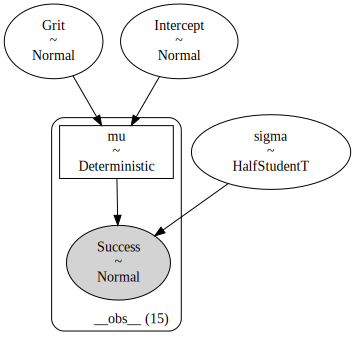

In [21]:
graphviz = pm.model_to_graphviz(model2.backend.model)
graphviz